# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "right") 

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [147]:
# Checking the number of mice.
combined_data_count= len(combined_data ["Mouse ID"].value_counts())
combined_data_count

249

In [148]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
find_duplicated_rows = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mice = combined_data.loc[find_duplicated_rows,'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [149]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicated_mice)==False]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [150]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_count = len(cleaned_data['Mouse ID'].value_counts())
cleaned_data_count

248

## Summary Statistics

In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

cleaned_data_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
cleaned_data_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
cleaned_data_var = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
cleaned_data_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
cleaned_data_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
print(cleaned_data_mean)
print(cleaned_data_median)
print(cleaned_data_var)
print(cleaned_data_std)
print(cleaned_data_sem)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = pd.DataFrame({"Mean Tumor Volume":cleaned_data_mean,
                              "Median Tumor Volume":cleaned_data_median,
                              "Tumor Volume Variance":cleaned_data_var,
                              "Tumor Volume Std. Dev.":cleaned_data_std,
                              "Tumor Volume Sem.":cleaned_data_sem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Sem.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

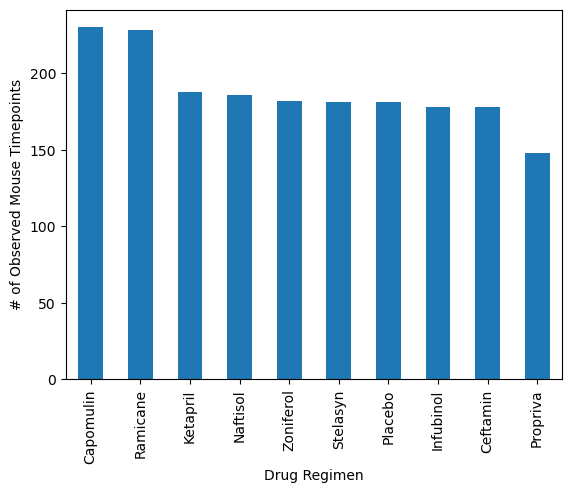

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

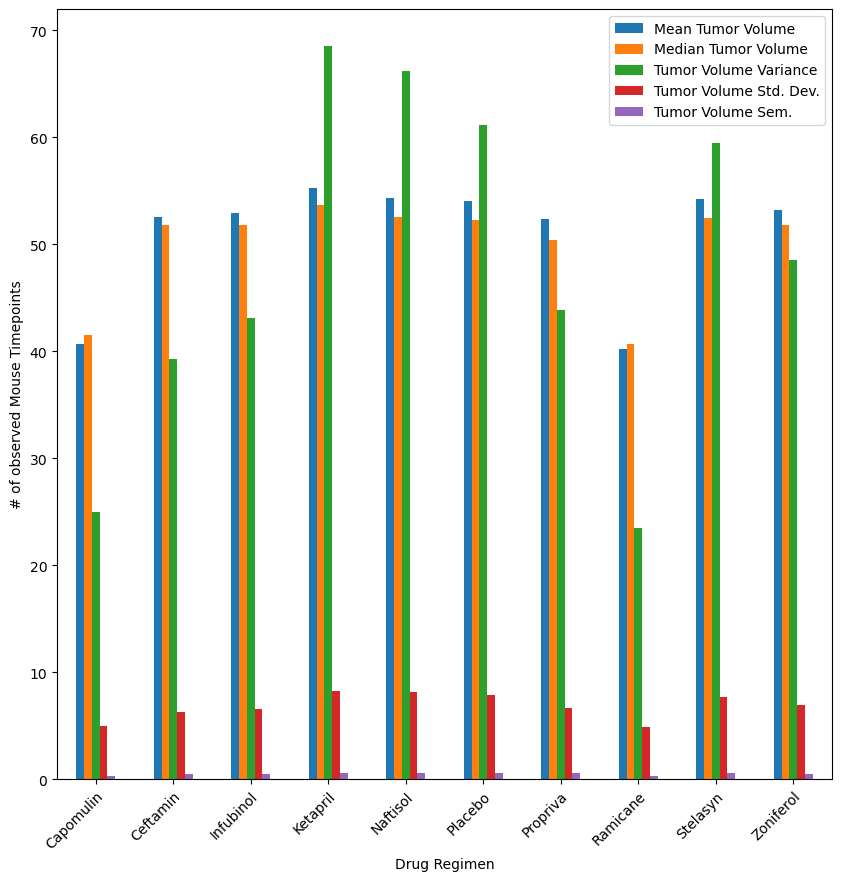

In [154]:
# Generate a bar plot showing the parameters per Drug Regimen
summary_plot = summary_table.plot(kind= "bar", figsize=(10,10))
summary_plot.set_xlabel("Drug Regimen")
summary_plot.set_ylabel("# of observed Mouse Timepoints")
xticklabels = summary_table.index
summary_plot.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.show()

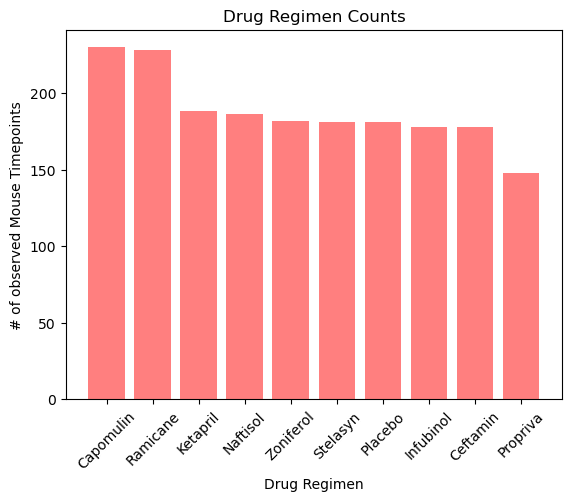

In [166]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = cleaned_data["Drug Regimen"].value_counts().index
y_axis = cleaned_data["Drug Regimen"].value_counts().values

plt.bar(x_axis, y_axis, color='red', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')  
plt.ylabel('# of observed Mouse Timepoints')        
plt.title('Drug Regimen Counts')  
plt.xticks(rotation=45)    
plt.show() 


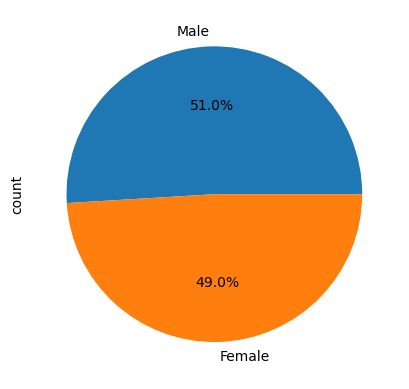

In [156]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

counts = cleaned_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%.1f%%')

# Make the pie chart
plt.show()

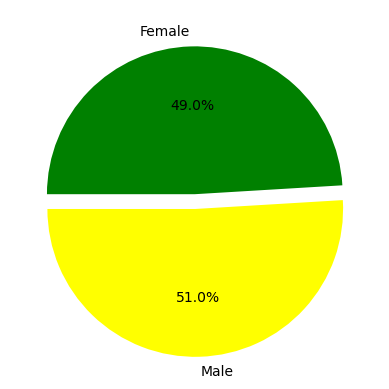

In [157]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
counts_pyplot= cleaned_data ["Sex"].value_counts()
counts_pyplot
Gender = counts_pyplot.index
Gender


# Make the pie chart
pie_counts = counts_pyplot
colors = ["yellow","green"]
explode = (0.1,0)
plt.pie(pie_counts, explode=explode, labels=Gender, colors=colors,
        autopct="%1.1f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = cleaned_data.groupby(["Mouse ID"]) ["Timepoint"].max()
final_tumor = final_tumor.reset_index()
final_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_data = final_tumor.merge(cleaned_data, on=['Mouse ID','Timepoint'], how="left")
new_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [159]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = new_data.loc[new_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


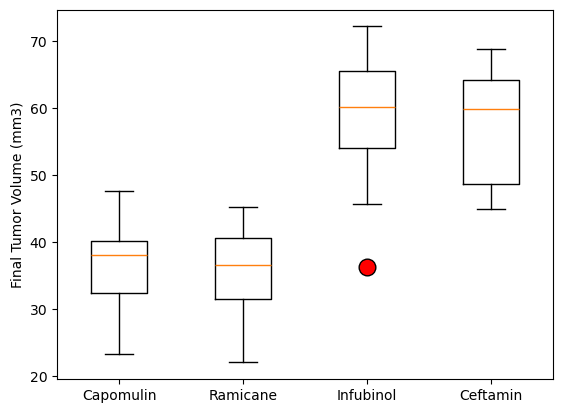

In [160]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
mark_outlier_red = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=mark_outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

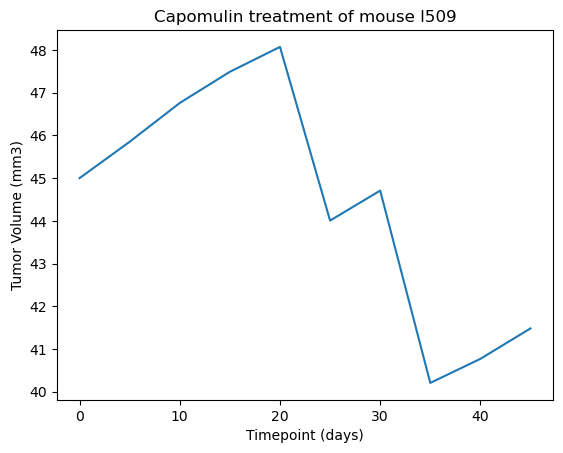

In [161]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

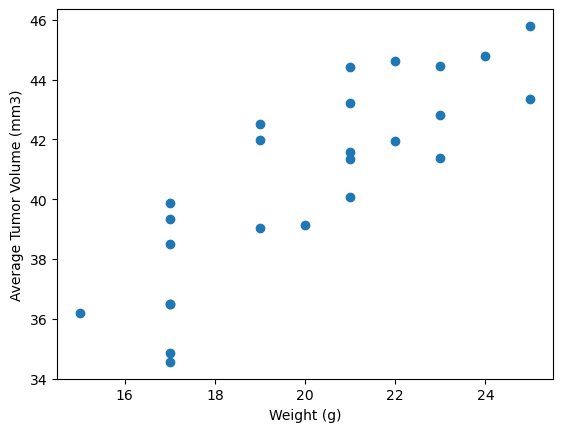

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


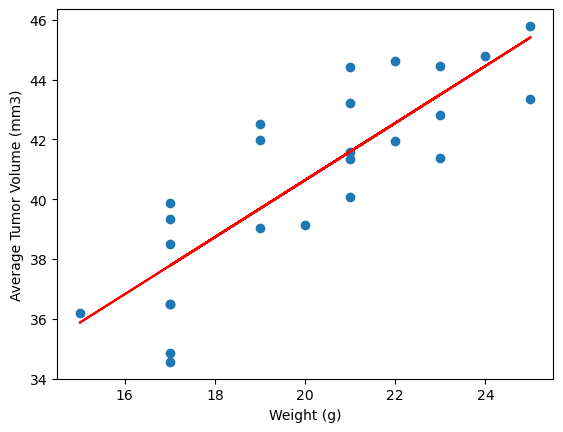

In [127]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="Red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

##

Intent is to analyze a set of spreadsheets containing information that tests the efficacy of certain drugs at reducing tumor sizes in mice.

Bar Charts
This shows the drug regimen in relation to the count. Capomulin has the highest count followed closely by Ramicane. Propriva has the least count
.
Pie Charts
Shows the gender spread of the dataset. The dataset shows a nearly even distribution of gender, with male and female counts being closely match
ed.
Statistical Analysis
The mean and median are closely aligned for each individual drug regimen. However, the variance for Ketapril, Naftisol, Placebo, and Stelasyn is relatively high, indicating significant data disper
sion.
Box plot shows 
Both the Capomulin and Ramicane drug regimens exhibit a smaller interquartile range compared to Infubinol and Ceftamin, with Infubinol showing the presence of an outlier. Additionally, Ramicane appears to be more evenly distributed than Capomulin, as indicated by the median line being more centrally located within its bo
x plot.
Scatter Plot
Capomulin Drug Regimen- Case Study
The scatter plot of mouse weight versus average tumor volume indicates a positive correlation: as mouse weight increases, the average tumor volume also tends to increase. This relationship is further supported by the correlation coefficient and the linear regression model.
